#   [Py4Hw User Guide](../UserGuide.ipynb)> 6.1 Schematic Visualization
###  [Next: 6.2 Manipulating Schematics](Manipulation.ipynb)

In [1]:
import sys
import platform
if (platform.uname().node == 'TPY14'):
    print('Dev machine')
    sys.path.append('..\\..\\..\\py4hw')

Dev machine


In [2]:
import py4hw
import matplotlib.pyplot as plt

The schematic object allows to control various things of the visualization process.
For instance, we can observe the internal occupancy grid used by the place & route algorithm

col: 0 ['InPortSymbol->OrSymbol', 'InPortSymbol->Mux2Symbol', 'InPortSymbol->OrSymbol', 'InPortSymbol->OrSymbol']
col: 1 ['OrSymbol->Mux2Symbol', 'Mux2Symbol->Mux2Symbol', 'InstanceSymbol->Mux2Symbol', 'InstanceSymbol->PassthroughSymbol', 'OrSymbol->PassthroughSymbol', 'FeedbackStopSymbol->Mux2Symbol', 'FeedbackStopSymbol->PassthroughSymbol', 'FeedbackStopSymbol->Mux2Symbol', 'FeedbackStopSymbol->PassthroughSymbol', 'FeedbackStopSymbol->OrSymbol', 'FeedbackStopSymbol->PassthroughSymbol']
col: 2 ['Mux2Symbol->RegSymbol', 'PassthroughSymbol->PassthroughSymbol', 'PassthroughSymbol->RegSymbol', 'PassthroughSymbol->PassthroughSymbol', 'PassthroughSymbol->PassthroughSymbol']
col: 3 ['RegSymbol->AddSymbol', 'RegSymbol->InstanceSymbol', 'PassthroughSymbol->AddSymbol', 'RegSymbol->FeedbackStartSymbol', 'PassthroughSymbol->FeedbackStartSymbol', 'RegSymbol->PassthroughSymbol']
col: 4 ['InstanceSymbol->OutPortSymbol', 'PassthroughSymbol->OutPortSymbol', 'AddSymbol->FeedbackStartSymbol', 'Passthrou

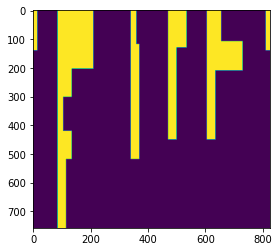

In [14]:
sys = py4hw.HWSystem()
reset = sys.wire('reset')
inc = sys.wire('inc')
q = sys.wire('q', 8)
co = sys.wire('co')

counter = py4hw.ModuloCounter(sys, 'mod7', 7, reset, inc, q, co)
sch = py4hw.Schematic(counter)

#q2 = sys.wire('q2', 8)
#count = sys.wire('count', 8)


#py4hw.Sequence(sys, 'inc', [0, 1], inc)
#py4hw.Add(sys, 'counter', q, inc, count)
#py4hw.Reg(sys, 'reg2', d=count, enable=inc, q=q2)
#py4hw.Reg(sys, 'reg', d=q2, enable=inc, q=q)
#py4hw.Scope(sys, 'q', q)
    
#sch = py4hw.Schematic(sys)
#sch.createRender((20,5), dpi=100)
#sch.draw()
grid = sch.getOccupancyGrid()
plt.imshow(grid)
plt.show()

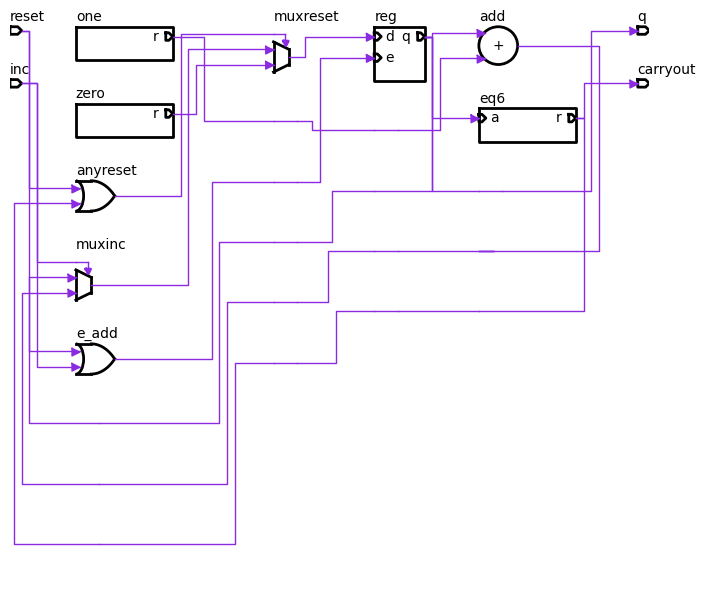

In [16]:
sch.createRender()
sch.draw()
#sch.drawAll()

Disecting the Place and Route process

col: 0 ['InPortSymbol->OrSymbol', 'InPortSymbol->Mux2Symbol', 'InPortSymbol->OrSymbol', 'InPortSymbol->OrSymbol']
col: 1 ['OrSymbol->Mux2Symbol', 'Mux2Symbol->Mux2Symbol', 'InstanceSymbol->Mux2Symbol', 'InstanceSymbol->PassthroughSymbol', 'OrSymbol->PassthroughSymbol', 'FeedbackStopSymbol->Mux2Symbol', 'FeedbackStopSymbol->PassthroughSymbol', 'FeedbackStopSymbol->Mux2Symbol', 'FeedbackStopSymbol->PassthroughSymbol', 'FeedbackStopSymbol->OrSymbol', 'FeedbackStopSymbol->PassthroughSymbol']
col: 2 ['Mux2Symbol->RegSymbol', 'PassthroughSymbol->PassthroughSymbol', 'PassthroughSymbol->RegSymbol', 'PassthroughSymbol->PassthroughSymbol', 'PassthroughSymbol->PassthroughSymbol']
col: 3 ['RegSymbol->AddSymbol', 'RegSymbol->InstanceSymbol', 'PassthroughSymbol->AddSymbol', 'RegSymbol->FeedbackStartSymbol', 'PassthroughSymbol->FeedbackStartSymbol', 'RegSymbol->PassthroughSymbol']
col: 4 ['InstanceSymbol->OutPortSymbol', 'PassthroughSymbol->OutPortSymbol', 'AddSymbol->FeedbackStartSymbol', 'Passthrou

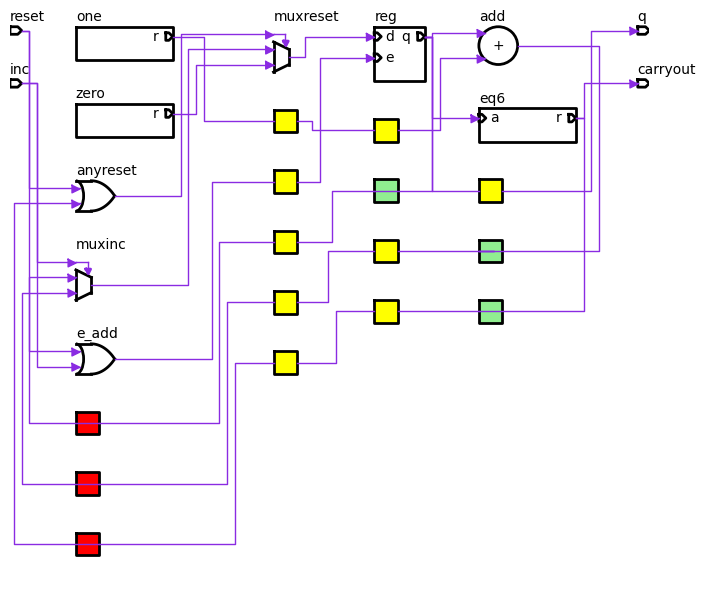

In [19]:
sch = py4hw.Schematic(counter, placeAndRoute=False)

sch.placeInputPorts()
sch.placeInstances()
sch.placeOutputPorts()

sch.bruteForceSort()
sch.columnAssignment()

#sch.createNetsWithMaxFanout(3)
sch.createNets()
sch.passthroughCreation(debug=False)
#sch.removeArrowsSpecialCases()

sch.rowAssignment()

#for idx, net in enumerate(sch.nets):
#    print('net {} - sourcecol: {}'.format(idx, net.sourcecol))
    
sch.trackAssignment()
sch.replaceAsColRow()

#self.replaceByAdjacencyMatrix()

# self.replaceByDependency()

#self.replaceVerticalCompress()
# #self.replaceHorizontalCompress()


sch.routeNets(mode='square')

sch.draw()

In [18]:
sch.channels[2]

{'tracks': 0, 'track': {}, 'sourcewidth': 0}